In [1]:
!pip install sklearn-genetic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 160 kB 5.3 MB/s 


In [2]:
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from genetic_selection import GeneticSelectionCV
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import *
from google.colab import files, drive, data_table
from google.colab.data_table import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# membaca data .csv untuk dilakukan preparation
url = 'https://raw.githubusercontent.com/Dtscience80/ANN-Testing-Approach-for-reduced-feature-aircraft-power-and-momentum-prediction-/main/df_minmax.csv'
df=pd.read_csv(url)
display(df.head())

,P0,Q0,V0,RHO,T0,RE,ALFA,BETA,CL,CD,CM25,CYAW,CROLL,CY
0,0.689680,0.987654,0.6875,1.000000,0.000000,0.939394,0.002220,0.5,0.016696,0.694596,1.0,0.000000,0.584459,0.930882
1,0.682562,0.962963,0.6250,1.000000,0.024624,0.909091,0.033619,0.5,0.015495,0.629661,1.0,0.000000,0.672297,0.963235
2,0.674021,0.839506,0.3125,0.928571,0.051984,0.848485,0.065017,0.5,0.013631,0.540427,1.0,0.306818,0.516892,0.630882
3,0.664057,0.888889,0.5625,0.928571,0.065663,0.878788,0.098319,0.5,0.029871,0.444491,1.0,0.147727,0.692568,0.819118
4,0.658363,0.864198,0.4375,0.928571,0.073871,0.848485,0.131304,0.5,0.061275,0.358609,1.0,0.375000,0.523649,0.598529


In [4]:
# memisahkan data untuk training dan testing dari data Normalisasi Untuk masing2 target 
X = df.drop(columns=['CL', 'CD', 'CM25', 'CYAW', 'CROLL', 'CY'])   #Feature Matrix
a = df['CL']          #Target Variable
b = df['CD']          #Target Variable
c = df['CM25']        #Target Variable
d = df['CYAW']        #Target Variable
e = df['CROLL']       #Target Variable
f = df['CY']          #Target Variable
X

,P0,Q0,V0,RHO,T0,RE,ALFA,BETA
0,0.689680,0.987654,0.6875,1.000000,0.000000,0.939394,0.002220,0.5
1,0.682562,0.962963,0.6250,1.000000,0.024624,0.909091,0.033619,0.5
2,0.674021,0.839506,0.3125,0.928571,0.051984,0.848485,0.065017,0.5
3,0.664057,0.888889,0.5625,0.928571,0.065663,0.878788,0.098319,0.5
4,0.658363,0.864198,0.4375,0.928571,0.073871,0.848485,0.131304,0.5
...,...,...,...,...,...,...,...,...
576,0.654093,0.592593,0.2500,0.714286,0.325581,0.575758,0.813828,0.5
577,0.661210,0.617284,0.3750,0.714286,0.328317,0.606061,0.845227,0.5
578,0.669751,0.765432,0.8125,0.642857,0.336525,0.636364,0.875040,0.5
579,0.686833,0.617284,0.4375,0.642857,0.344733,0.575758,0.904535,0.5


## **Feature Selection **

# Scoring list : 
[metrics.explained_variance_score](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring)

*   ‘max_error’ metrics.max_error
*   ‘neg_mean_absolute_error’ metrics.mean_absolute_error
*   ‘neg_mean_squared_error’ metrics.mean_squared_error
*   ‘neg_root_mean_squared_error’ metrics.mean_squared_error
*   ‘neg_mean_squared_log_error’ metrics.mean_squared_log_error
*   ‘neg_median_absolute_error’ metrics.median_absolute_error
*   ‘r2’ metrics.r2_score
*   ‘neg_mean_poisson_deviance’ metrics.mean_poisson_deviance
*   ‘neg_mean_gamma_deviance’ metrics.mean_gamma_deviance
*   ‘neg_mean_absolute_percentage_error’ 
*   ‘d2_absolute_error_score’
*   ‘d2_pinball_score’ metrics.d2_pinball_score
*   ‘d2_tweedie_score’ metrics.d2_tweedie_score



In [5]:
Y = e.astype(float)

estimators = linear_model.LinearRegression()
#estimators = DecisionTreeRegressor()
#estimators = RandomForestRegressor()
#estimators = MLPRegressor()
t1=time.time()
print(t1)

report = pd.DataFrame()
nofeats = [] 
chosen_feats = [] 
cvscore = [] 

print("Estimator dipakai : ", estimators )
for i in range(1,8):  
  selector = GeneticSelectionCV(estimators,
                                cv = 5,
                                verbose = 1,
                                scoring="neg_mean_squared_error", 
                                max_features = i,
                                n_population = 200,
                                crossover_proba = 0.5,
                                mutation_proba = 0.2,
                                n_generations = 50,
                                crossover_independent_proba=0.5,
                                mutation_independent_proba=0.1,
                                tournament_size = 3,
                                n_gen_no_change=10,
                                caching=True,
                                n_jobs=-1)
  selector = selector.fit(X, Y)
  genfeats = X.columns[selector.support_]
  genfeats = list(genfeats)
  print("Chosen Feats: {} of {}, scores : {} " .format(genfeats, selector.n_features_, round(selector.generation_scores_[-1], 3)))

  cv_score = selector.generation_scores_[-1]
  nofeats.append(len(genfeats)) 
  chosen_feats.append(genfeats) 
  cvscore.append(cv_score)

report["No of Feats"] = nofeats
report["Chosen Feats"] = chosen_feats
report["Scores"] = cvscore
#Lama waktu Proses 
t2=time.time()
t_polyfit = float(t2-t1)
print("Time taken: {} seconds".format(t_polyfit))

1655796946.7124705
Estimator dipakai :  LinearRegression()
Selecting features with genetic algorithm.
gen	nevals	avg                            	std                            	min                            	max                            
0  	200   	[-0.080828  1.        0.047755]	[ 0.020922  0.        0.017643]	[-0.089226  1.        0.002126]	[-0.02671   1.        0.054983]
1  	125   	[-2150.053795     1.17      2150.029357]	[ 4108.195307     0.664154  4108.208097]	[-10000.            0.            0.002126]	[   -0.02671     5.      10000.     ]
2  	117   	[-2450.036831     1.09      2450.015625]	[ 4300.851024     0.530943  4300.863104]	[-10000.            0.            0.002126]	[   -0.02671     3.      10000.     ]
3  	135   	[-2100.025736     1.145     2100.005583]	[ 4073.069102     0.577906  4073.079492]	[-10000.            0.            0.002126]	[   -0.02671     4.      10000.     ]
4  	120   	[-1550.024115     1.165     1550.003095]	[ 3619.036508     0.572516  3619.04551 ]	[-

In [6]:
#Print Reports 
report["Scores"] = np.round(report["Scores"], 3)
report.sort_values(by = "Scores", ascending = False, inplace = True)
#report.index
ga_feats = report.iloc[0]["Chosen Feats"]
DataTable(report)
print("Feature selection of '" + Y.name + "' recommend:", ga_feats)
print("Estimator : {}, reports : ". format(selector.estimator_))
report

Feature selection of 'CROLL' recommend: ['Q0', 'ALFA', 'BETA']
Estimator : LinearRegression(), reports : 


,No of Feats,Chosen Feats,Scores
2,3,"[Q0, ALFA, BETA]",-0.026
3,3,"[Q0, ALFA, BETA]",-0.026
4,3,"[Q0, ALFA, BETA]",-0.026
5,3,"[Q0, ALFA, BETA]",-0.026
6,3,"[Q0, ALFA, BETA]",-0.026
0,1,[BETA],-0.027
1,2,"[RHO, BETA]",-0.027


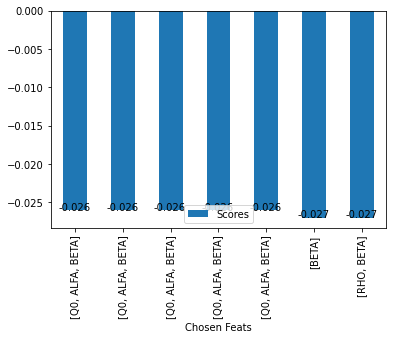

In [7]:
# Plot feature score 
score = np.round(report["Scores"], 3)
report.plot(kind='bar',x='Chosen Feats',y='Scores')
xlocs, xlabs = plt.xticks()
for i, v in enumerate(score):
    plt.text(xlocs[i] - 0.35, v , str(v))